![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

In [1]:
'''
OPTICS Clustering for Identification of Potential Pairs
'''
#Import packages
import numpy as np
import pandas as pd
from numpy import sqrt,mean,log,diff
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from statsmodels.tsa.stattools import coint
from sklearn.cluster import OPTICS
from scipy import stats
from statsmodels.tsa.stattools import coint, adfuller
from statsmodels import regression,stats
import statsmodels.api as sm
qb = QuantBook()

#Toggle which industry to screen (only choose one)
T_screen = False
HC_screen = False 
CD_screen = False
CS_screen = False
Fin_screen = False
Ind_screen = True

In [2]:
'''
Initialize tickers from Universe Selection screen by industry.
Six largest industries by market cap in S&P 500 are used.
Tickers are screened on April 15, 2021.
Technology, Healthcare, Consumer Discretionary, Communication Services, Financials, and Industrials..
For further reference, see https://www.thebalance.com/what-is-the-sector-weighting-of-the-s-and-p-500-4579847
'''

#1. Technology (MorningstarSectorCode.Technology)
tickers_tech = ['AAPL', 'ABST', 'ACLS', 'ACMR', 'ACN', 'ADBE', 'ADI', 'ACVA', 'ADTN', 'ACXM', 'ADSK', 'AEYE', 'AGMH', 'AFRM', 'AHA', 'AI', 'AKTS', 'ALGM', 'ALLT', 'AKAM', 'ALTR', 'AMKR', 'ALRM', 'AMAT', 'ANSR', 'ANSS', 'AMBA', 'AMSWA', 'APH', 'APPN', 'AOSL', 'APPY', 'APAT', 'ANET', 'APPF', 'ARRY', 'ARW', 'ASAN', 'AMD', 'AVT', 'ATMR', 'ASMLF', 'ATC', 'AVYA', 'AVLR', 'AVGO', 'AZPN', 'AUDC', 'BCOV', 'BEEM', 'AXTI', 'BAND', 'AYX', 'BILL', 'BNFT', 'BOX', 'BHE', 'BLKB', 'BL', 'BIGC', 'BR', 'BRKS', 'BKI', 'BMBL', 'CDAY', 'CDKVV', 'CACI', 'CHKPF', 'CEY', 'CDN', 'BSY', 'CALX', 'CDW', 'CAMP', 'CAMT', 'CANNY', 'CCMP', 'COUP', 'COHR', 'CNXC', 'COHU', 'CLSK', 'CIEN', 'CRM', 'CLDR', 'CCC', 'CRNCV', 'CGNT', 'CGNX', 'CSCO', 'CRCT', 'CMBM', 'CSGS', 'CREE', 'CTS', 'CTSH', 'CSIQ', 'DELL', 'CTACU', 'COMM', 'CRSR', 'COMP', 'CMTL', 'DCT', 'DGII', 'CSOD', 'CTXS', 'DNJR', 'CRUS', 'DDOG', 'DT', 'CRWD', 'DOCN', 'DMRC', 'DOCU', 'CVLT', 'CYBR', 'DOMO', 'DBD', 'DBX', 'DCBO', 'DIO', 'DOX', 'DNB', 'DLB', 'ENPH', 'ESE', 'DLPH', 'DSGXF', 'DXC', 'EB', 'EPAM', 'ECOM', 'EVBG', 'DSP', 'ESTC', 'FAF', 'EPAY', 'EGHT', 'DSPG', 'ERICY', 'ENTG', 'EGOV', 'EEFT', 'FISV', 'EXLS', 'ENV', 'FARO', 'EVOP', 'FOUR', 'FLIR', 'EVTC', 'FEYE', 'G', 'FNTE', 'FIVN', 'GDDY', 'FLT', 'FROG', 'FLEXF', 'GART', 'FORM', 'FTNT', 'GDS', 'FFIV', 'FORTY', 'GB', 'GLW', 'FTV', 'HWP', 'HSTX', 'HPE', 'FSLR', 'FIC', 'FSLY', 'GSCN', 'GMHI', 'HATH', 'GIB', 'GBOX', 'FN', 'GPRO', 'IMOS', 'HBB', 'JBIL', 'INTC', 'GWRE', 'IBM', 'GRMN', 'HUBS', 'GLOB', 'INTU', 'INTZ', 'INFN', 'KEYS', 'INFO', 'LFUS', 'LYFT', 'INFY', 'LSCC', 'JFAX', 'ICHR', 'IPGP', 'IIIV', 'LSPD', 'IPHI', 'ITRI', 'ITRN', 'IIVI', 'KLAC', 'KARO', 'JKHY', 'INS', 'KLIC', 'LASR', 'MANH', 'JNPR', 'MANT', 'LOGIY', 'JAMF', 'IRBT', 'LITEV', 'LAZR', 'KN', 'MSFT', 'LUNA', 'MCFE', 'MCHP', 'MIME', 'LPL', 'MNDL', 'MVIS', 'METHA', 'MITK', 'LPSN', 'MPWR', 'MAXNV', 'NCNO', 'MIXT', 'MSP', 'NCR', 'MSTR', 'LRCX', 'MWK', 'NATI', 'MKSI', 'MGICF', 'NXPI', 'MDA', 'MX', 'ONTF', 'MDB', 'NVDA', 'ONTO', 'MLAB', 'MODN', 'NVEC', 'NICEY', 'MXIM', 'NSIT', 'MLCH', 'MDLA', 'MXL', 'NVMI', 'NVMM', 'NOVA', 'NOW', 'NET', 'NTAP', 'MOT', 'NEWR', 'OKTA', 'MTSI', 'NTCT', 'NPTN', 'NTGR', 'MRVL', 'PAYA', 'PAYC', 'MU', 'PCTY', 'NTNX', 'ORCL', 'OLO', 'PCVA', 'QCOM', 'ROG', 'PRSP', 'SAI', 'PLT', 'PD', 'SAIC', 'PLTR', 'QLYS', 'OSIS', 'SAIL', 'PAGS', 'PLXS', 'PFPT', 'PDFS', 'SEMR', 'ON', 'OTEXF', 'PAMT', 'QRVO', 'PANL', 'TENB', 'SANM', 'RP', 'SLAB', 'PANW', 'PMTC', 'TER', 'SAP', 'PCCC', 'RPD', 'QTWO', 'SATS', 'PSTG', 'SPLK', 'SYKE', 'SYMC', 'SYNA', 'SPNSF', 'PEGA', 'PTAC', 'STM', 'PTC', 'TTEC', 'STMP', 'STNE', 'SLTD', 'SGH', 'TTMI', 'SMAR', 'SPSC', 'UIS', 'SPT', 'PI', 'TUFN', 'SMCI', 'PUBM', 'SPWR', 'SQ', 'POWI', 'PING', 'SMMC', 'RUN', 'PIOS', 'SHLS', 'STX', 'SMTC', 'SCMM', 'SHOP', 'TBRG', 'TRMB', 'SUMO', 'PRFT', 'UNPH', 'TRNE', 'TXN', 'SCSC', 'RXT', 'PLAB', 'TIXT', 'PRGS', 'RMBS', 'UPLD', 'PLAN', 'TYL', 'SILCF', 'SNOW', 'RDVTV', 'U', 'SCWX', 'VCRA', 'RNG', 'RDWR', 'SVMK', 'SABR', 'TLS', 'PRO', 'SSNC', 'SITM', 'SNPS', 'USAT', 'VDSI', 'USAT', 'SWCH', 'VECO', 'SEDG', 'SWI', 'QADA', 'SSTI', 'SWIR', 'QADI', 'SNX', 'TDC', 'TSAI', 'VRNS', 'SSYS', 'VERI', 'VRNT', 'ST', 'VERX', 'UBER', 'WXS', 'UBNT', 'TDSC', 'VRSN', 'ZS', 'TSEMF', 'VSAT', 'TDY', 'VSCI', 'TEAM', 'ZUO', 'UTME', 'VSH', 'TSM', 'SONO', 'UCTT', 'VSNR', 'TSRA', 'TEL', 'VICR', 'WIX', 'XLNX', 'TTD', 'WK', 'XM', 'UEIC', 'VUZI', 'VLDR', 'VZIO', 'XRX', 'YEXT', 'VMW', 'WORK', 'WDAY', 'WDC', 'VNT', 'ZBRA', 'VNTW', 'VOX', 'ZEN', 'VPG', 'ZHNE', 'ZI']
#2. Healthcare (MorningstarSectorCode.Healthcare)
tickers_HC = ['A', 'ABBV', 'AAS', 'ABCL', 'ABMD', 'ABT', 'ACAD', 'ACCD', 'ACET', 'ACHC', 'ABCM', 'ACRS', 'ADPT', 'ADRO', 'ADCT', 'ADUS', 'AERI', 'AFIB', 'AGIO', 'AHS', 'AHCO', 'AHPA', 'AKUS', 'ALEC', 'ALHC', 'ALT', 'ALC', 'ALVR', 'ALGN', 'ALGS', 'AKRO', 'ALDX', 'ALXN', 'ALNY', 'ALXO', 'AMED', 'ALKS', 'AMEH', 'AMPH', 'ANGN', 'AMGN', 'AMYT', 'ANGO', 'ALLK', 'AMHC', 'ALLO', 'ANIK', 'AMTI', 'APLT', 'ANAB', 'ANNX', 'AQXP', 'AMWL', 'ARVN', 'APR', 'ARNA', 'APLS', 'ARWR', 'ARQT', 'ARCT', 'ATHA', 'ATEC', 'ASTM', 'ATH', 'AVXL', 'AXGN', 'AUPH', 'AXNX', 'ARGX', 'BAX', 'AVII', 'AVIR', 'BBIO', 'ATRA', 'BABY', 'AXSM', 'ATRC', 'BCAB', 'AVRO', 'ATRI', 'BCEL', 'BDAL', 'BIO.B', 'BLUE', 'BIOA', 'BIOD', 'BGNE', 'BDSX', 'BDTX', 'BDX', 'BLFS', 'BLI', 'BEAM', 'BPA', 'BMRN', 'BPMC', 'BMY', 'BHVN', 'BSX', 'BOLT', 'CABA', 'BTAI', 'CAH', 'BVF', 'BVS', 'CALT', 'CELC', 'CBYL', 'CBPO', 'CHNG', 'CCCC', 'CDNA', 'CERE', 'CHRS', 'CATS', 'CDXS', 'CERN', 'CERT', 'CARA', 'CGC', 'CGEM', 'CI', 'CRTX', 'CLLS', 'CPSI', 'CLNN', 'CRY', 'CNAC', 'CLVR', 'CHE', 'COLL', 'CCXI', 'CDAK', 'CNMD', 'CRIS', 'CRL', 'COO', 'CSTL', 'CTLT', 'CVS', 'DBTX', 'CRNX', 'CNST', 'CNTE', 'DCPH', 'CNTG', 'CORT', 'CRSP', 'CNTL', 'CUE', 'CYH', 'DGX', 'EDIT', 'CYTK', 'CUTR', 'DXCM', 'CVAC', 'DHR', 'DRIO', 'DRNA', 'DYN', 'CVETV', 'EAR', 'DSGN', 'EPIX', 'DNLI', 'EPTO', 'ESPR', 'EGG', 'EBS', 'EGRX', 'ENSG', 'ESTA', 'FDMT', 'ENTA', 'FATE', 'FHTX', 'EW', 'ETNB', 'ELAN', 'EWTX', 'EXAS', 'EXEL', 'EOLS', 'FBRX', 'EVH', 'EVLO', 'FORA', 'FLGT', 'FULC', 'FMS', 'GNMK', 'FMTX', 'FGEN', 'FPRX', 'FNCH', 'HGEN', 'HRTX', 'GH', 'HSAC', 'HSIC', 'HSKA', 'HSTM', 'HAE', 'HIV', 'FREQ', 'ICLRY', 'ICPT', 'HARP', 'ICUI', 'GB', 'GILD', 'HTI', 'IDPH', 'GKOS', 'IDXX', 'IDYA', 'HB', 'GBIO', 'HNGR', 'GRFS', 'GLPG', 'HOLX', 'IGMS', 'GLSI', 'HUM', 'GBT', 'GLX', 'HCA', 'HOOK', 'GMAB', 'GMED', 'HOWT', 'HCAT', 'HYH', 'HZNP', 'HCM', 'INMD', 'IKNA', 'HCSG', 'ILMN', 'INNV', 'INOV', 'HQY', 'IART', 'INSM', 'HRC', 'GDRX', 'JAZZ', 'INSP', 'IMNM', 'HRMY', 'KURA', 'GTHX', 'GTS', 'IMTX', 'KYMR', 'LABP', 'INBX', 'INCR', 'INZY', 'INCY', 'IOVA', 'LSAC', 'INFU', 'KIDS', 'INGN', 'INHL', 'JNJ', 'KITS', 'MGLN', 'MGNX', 'LGND', 'MGTA', 'MGTX', 'LH', 'IQV', 'LHCG', 'IRMD', 'LIVN', 'JYNT', 'IRTC', 'KNSA', 'MCK', 'IRWD', 'KNTE', 'MCRB', 'MIRM', 'KOD', 'LLY', 'ISIP', 'LMAT', 'LUNG', 'ISRG', 'MDGL', 'KBIO', 'KPTI', 'KBLM', 'LVTX', 'MOH', 'MDRX', 'MOR', 'MORF', 'MDT', 'ITCI', 'LMNX', 'ITEK', 'ITMR', 'MDXG', 'ITOS', 'MEDP', 'KRON', 'KROS', 'KRTX', 'IVA', 'KRYS', 'LNTH', 'MMSI', 'NBTX', 'MASI', 'MRIC', 'MASS', 'MRK', 'MRNA', 'MRNS', 'OSCR', 'OCUL', 'MRSN', 'OSH', 'MRTX', 'MRUS', 'NUVA', 'MRVI', 'NEO', 'NVCR', 'NEOG', 'NNOX', 'MYGN', 'OFIXF', 'PCRX', 'MYOS', 'MYOV', 'NEXI', 'NVO', 'NVRO', 'PCVX', 'NVS', 'NVST', 'NFH', 'MSON', 'PDCO', 'NVTA', 'NOX', 'NGM', 'OLMA', 'MTD', 'PDX', 'NHC', 'NARI', 'OM', 'OYST', 'NRCIV', 'OMCL', 'OMER', 'PEN', 'NRIX', 'OMI', 'PACB', 'PETQ', 'ONCR', 'PETS', 'NKTX', 'ONEM', 'PAHC', 'NBIX', 'PFE', 'NSTG', 'PASG', 'PNTG', 'PTCT', 'PHAR', 'PTGX', 'PHAT', 'PTIE', 'PODD', 'OCDX', 'OPCH', 'PHG', 'RAD', 'OPRX', 'PHR', 'PHVS', 'OPT', 'NTLA', 'RAPT', 'RARE', 'NTRA', 'PGNY', 'PPD', 'PINC', 'ORIC', 'PBH', 'PRAH', 'PRAX', 'RCEL', 'PVTR', 'RUBY', 'PRGO', 'RCM', 'SGMO', 'RCUS', 'SBTX', 'SGRY', 'RDNT', 'SGTX', 'RDUS', 'RVMD', 'SHC', 'RLAY', 'PRLD', 'RVNC', 'RDY', 'RVP', 'RDYN', 'PROF', 'RLMD', 'PLRX', 'PLSE', 'RXDX', 'PRSC', 'REGN', 'REPL', 'PRTA', 'RESM', 'PRTC', 'SIBN', 'PRTG', 'RETA', 'RNA', 'QDEL', 'RYTM', 'RNLX', 'QGENF', 'SDC', 'SILK', 'PSNL', 'SDGR', 'RFL', 'QSII', 'PMVP', 'SAGE', 'SIMU', 'QTRX', 'QURE', 'SEER', 'STRL', 'STRO', 'RGEN', 'SEM', 'SANA', 'RGNX', 'STTK', 'SQZ', 'TBIO', 'SRDX', 'RPHM', 'TBPHV', 'SNDX', 'SRRK', 'RPRX', 'SNN', 'RPTX', 'TCEL', 'SUPN', 'THRX', 'SLGL', 'SGEN', 'SGFY', 'TCLN', 'SNSE', 'TCMD', 'TXG', 'TCRR', 'TRL', 'TIL', 'SWAV', 'STAA', 'SNY', 'SLN', 'TDOC', 'STIM', 'TLIS', 'SWTX', 'SOLY', 'TLRY', 'TMDX', 'SYK', 'TMO', 'TECH', 'URGN', 'STOK', 'TNDM', 'SPNEV', 'TAK', 'TERN', 'TEVIY', 'TAROF', 'TARS', 'TSHA', 'VIR', 'SPRB', 'SPRO', 'TFFP', 'VTRSV', 'USPH', 'TPTX', 'UTHR', 'TFX', 'UHS', 'TGTX', 'TRHC', 'TRIL', 'WAG', 'THC', 'VNDA', 'XRAY', 'WAT', 'UM', 'TVTX', 'VOR', 'YMAB', 'VAPO', 'VAR', 'UNH', 'VRCA', 'VREX', 'WST', 'ZEAL', 'VCYT', 'ZEN', 'TWST', 'VECT', 'VEEV', 'ZGNX', 'VRTX', 'ZLAB', 'ZMH', 'VTL', 'ZNTL', 'XBIT', 'ZTS', 'XENE', 'XENT', 'XGN', 'ZYME', 'ZYXI', 'XLRN', 'XNCR', 'XOMA']
#3. Consumer Discretionary (MorningstarSectorCode.ConsumerCyclical)
tickers_CD = ['AAP', 'ABG', 'ACEL', 'AEOS', 'ADNT', 'AIRB', 'AIN', 'ALSN', 'ALV', 'ANF', 'AMWD', 'AOUTV', 'AMCR', 'AMZN', 'ARKO', 'ARD', 'ARGNA', 'ARVL', 'ASO', 'ARMK', 'ATR', 'AZO', 'BABA', 'BGFV', 'BBX', 'BERY', 'BH.A', 'BBBY', 'BBY', 'BC', 'BFAM', 'BKE', 'BG', 'BFI', 'BIOF', 'BLL', 'BLMN', 'BSET', 'BURL', 'BLNK', 'BWA', 'BZUN', 'BWMX', 'BOOT', 'BYD', 'CAKE', 'CCL', 'BXG', 'CBRL', 'CACOA', 'BZH', 'CARS', 'CHUY', 'CHWY', 'CCS', 'CNGR', 'CHGO', 'CNTY', 'COLM', 'CHDN', 'CHH', 'CLAC', 'CMG', 'CONN', 'CCK', 'CROX', 'CNNE', 'CTRN', 'COP', 'COH', 'CVCO', 'CRI', 'CWH', 'CRSV', 'CPNG', 'CTB', 'DAN', 'CPS', 'DESP', 'DPZ', 'DFH', 'DSW', 'DDS', 'CVNA', 'DRI', 'CUK', 'DOOO', 'DHI', 'DMYT', 'DKNG', 'DECK', 'DRVN', 'DKS', 'DSEY', 'DINE', 'DFXI', 'EAT', 'F', 'ETH', 'DLPH', 'EBAY', 'ERI', 'DLTH', 'ELY', 'ETSY', 'FD', 'FND', 'EXPE', 'FCAU', 'FNKO', 'FTDRV', 'FRG', 'FIVE', 'FRGI', 'EYE', 'GBIZ', 'FBHS', 'FUN', 'ESCA', 'FUV', 'FLWS', 'FLXS', 'HCAC', 'FM', 'HOME', 'H', 'GCA', 'HIBB', 'GRWG', 'GOLF', 'GM', 'HOV', 'FOSL', 'GMBL', 'GCO', 'GIII', 'GME', 'GOOS', 'FOXF', 'GIL', 'HD', 'GP', 'GAN', 'HZO', 'GPAC', 'HDI', 'HAS', 'HLT', 'GPC', 'GDEN', 'HMC', 'GPI', 'GT', 'GPK', 'HAVT', 'HTHT', 'HRB', 'GBCOA', 'IFSIA', 'GBCOB', 'GES', 'GNTX', 'FTCH', 'IGT', 'GPS', 'IHG', 'IHOP', 'HOFT', 'HGV', 'KORS', 'JWAIA', 'HBI', 'JD', 'IP', 'LZB', 'LCA', 'KIRK', 'LGIH', 'LCII', 'LMTR', 'LCUT', 'KAR', 'MBUU', 'KRUS', 'KBALB', 'MHK', 'KBH', 'LEA', 'LOCO', 'KSS', 'MHO', 'KCAC', 'KTB', 'MED', 'LEDMV', 'JOAN', 'LTD', 'MANU', 'MCD', 'MELI', 'LEG', 'MAR', 'KMX', 'LEGH', 'LOVE', 'MCFT', 'MIK', 'LOW', 'MPAA', 'LEN', 'LENB', 'MPEL', 'LESL', 'NCLH', 'MMYT', 'LULU', 'LKQX', 'MUSA', 'LEVI', 'LL', 'MAT', 'MCRI', 'LEVY', 'NATH', 'NDLS', 'LQDT', 'MGA', 'LVS', 'MNRO', 'MPX', 'MGG', 'MRA', 'MDC', 'MODI', 'ONEW', 'NOBE', 'MLHR', 'PATK', 'MTH', 'MYE', 'MTN', 'MLR', 'NVR', 'OI', 'NKE', 'MOVA', 'PLCE', 'OXM', 'PLNT', 'PLOW', 'ORLY', 'OMAD', 'ODP', 'SAH', 'ROL', 'SEE', 'QRTEA', 'PRTS', 'QRTEB', 'OSTK', 'REYN', 'SPAQ', 'SKX', 'OSW', 'SKY', 'ROST', 'QSR', 'SERV', 'PCLN', 'TOYOY', 'SLGN', 'SFIX', 'RACE', 'RGIS', 'PENN', 'TTM', 'RRGB', 'TPH', 'RRR', 'SGC', 'RH', 'TA', 'TUP', 'TPX', 'SBH', 'RICK', 'RIDE', 'ULTA', 'POOL', 'PTON', 'PHM', 'RII', 'POSH', 'SPWH', 'SHAK', 'PTVE', 'RBIN', 'PII', 'SBUX', 'THO', 'TRIP', 'SMP', 'RCKY', 'RL', 'RCL', 'RUSH', 'RUSHA', 'SHOO', 'RUTH', 'SRI', 'RVLV', 'TXRH', 'SRV', 'PKG', 'PVH', 'UA', 'TJX', 'URBN', 'SIGYY', 'REAL', 'SCVL', 'TKAT', 'TCS', 'UAG', 'PLAY', 'VC', 'UARM', 'TRWH', 'RNTA', 'TRY', 'VRM', 'SEAS', 'WH', 'TLYS', 'TMHC', 'WWW', 'PZZA', 'STAY', 'TDUP', 'SIX', 'TSCO', 'WYNN', 'WHR', 'VFC', 'WING', 'TSLA', 'WISH', 'SON', 'TEN', 'ZUMZ', 'WKHS', 'TOL', 'VSTO', 'VTIQ', 'UFI', 'UFPT', 'TTE', 'VAC', 'W', 'XPEL', 'WOOF', 'VNE', 'YETI', 'WRK', 'WSGC', 'YUM', 'VRA', 'YUMC', 'Z', 'WGO', 'WTW']
#4. Communication Services (MorningstarSectorCode.CommunicationServices)
tickers_CS = ['ABNB', 'ADV', 'AMX', 'AMOV', 'AMCX', 'ANK', 'ATUS', 'ATVI', 'ATHM', 'BATRA', 'AVID', 'BATRK', 'BCE', 'BILI', 'BEL', 'BIDU', 'BOMN', 'CABO', 'CARG', 'CHTR', 'CDLX', 'CMCSA', 'COUP', 'CNK', 'CHT', 'CSN', 'DISCA', 'DISCB', 'COI', 'DLX', 'DISCK', 'CSSE', 'DISH', 'CTL', 'DASH', 'DJCO', 'DMS', 'DIS', 'EVER', 'FEAC', 'FB', 'ERTS', 'GRPN', 'GOGO', 'GLUU', 'GRUB', 'GOOCV', 'GCI', 'FVRR', 'GHQ', 'FOXAV', 'GCSB', 'FOXBV', 'FTE', 'GOOG', 'IDC', 'IDTB', 'IAC', 'FUBO', 'HMTV', 'IMAXF', 'JWA', 'JWB', 'IHRT', 'LBTYA', 'LBTYB', 'LBTYK', 'LGF.A', 'IPG', 'LGF.B', 'LYV', 'KLR', 'LSXMA', 'LSXMB', 'MAIL', 'LSXMK', 'LILAV', 'LILKV', 'LORL', 'KTC', 'LTPBV', 'MSG', 'LBDAV', 'MSGE', 'LBDKV', 'MSGEW', 'MSGM', 'MSGS', 'NGMS', 'MCS', 'LMCAD', 'MAX', 'LMCKV', 'MTCH', 'MDP', 'NXST', 'OOMA', 'NYT', 'NTES', 'PCS', 'NFLX', 'ORBC', 'ROKU', 'OMC', 'QNST', 'PLTK', 'NWSAV', 'SKM', 'NWSVV', 'RG', 'PDVW', 'PSO', 'SAQN', 'SBC', 'RADI', 'TTGT', 'SBGI', 'PHI', 'TPUB', 'RUBI', 'RUK', 'TTWO', 'SPOT', 'TU', 'TV', 'SHET', 'PINS', 'RBLX', 'TWLO', 'SCHL', 'THRY', 'TRNC', 'SNAP', 'SCPL', 'TIGO', 'SCR', 'TIMB', 'TWTR', 'WWFE', 'TLK', 'ZM', 'ZNGA', 'USM', 'WIFI', 'SSP', 'TDS', 'SSTK', 'VG', 'SJR', 'VIAC', 'VIACA', 'WMG', 'YELP', 'WOW', 'YNDX', 'WPP', 'Z', 'VOD', 'ZG', 'VPRT']
#5. Financials (MorningstarSectorCode.FinancialServices)
tickers_FS = ['AACQ', 'AC', 'AC', 'ACIC', 'ACII', 'ABTX', 'ACBI', 'ABCB', 'ACTC', 'ACV', 'ADS', 'ADX', 'ACL', 'AFB', 'AFC', 'AFG', 'AFL', 'AEL', 'AGO', 'AGC', 'AJG', 'AINV', 'AIO', 'AIZ', 'AJAX', 'AIG', 'AGCB', 'ALLY', 'ALL', 'AMBC', 'AMAL', 'ALTU', 'AMP', 'ALRS', 'ALUS', 'AMK', 'AMSF', 'AMNB', 'AOC', 'APAM', 'AONE', 'APO', 'ANAT', 'AMRK', 'AMG', 'APXT', 'ARDC', 'ASPL', 'ARC', 'ARES', 'ASB', 'ARCC', 'ATCO', 'AROW', 'ASA', 'ATH', 'AVK', 'BANF', 'AXP', 'BCAT', 'AXS', 'BAP', 'BFK', 'BEN', 'BFST', 'BCH', 'AVZ', 'BFZ', 'AWF', 'BCM', 'BCS', 'BGB', 'BCSF', 'BHB', 'BGH', 'BKN', 'BBN', 'BDGE', 'BKU', 'BLW', 'BFC', 'BHFWV', 'BLX', 'BOWX', 'BGT', 'BHK', 'BHL', 'BIT', 'BNS', 'BMA', 'BRBS', 'BOAC', 'BLE', 'BME', 'BMEZ', 'BK', 'BOE', 'BPBC', 'BRKA', 'BLK', 'BMO', 'BOFI', 'BRKB', 'BMRC', 'BOH', 'BTNB', 'BRKL', 'BOKF', 'BTO', 'BPOP', 'BTT', 'BSGK', 'BTWN', 'BKLY', 'BTZ', 'BSRR', 'BXS', 'BMTC', 'BWB', 'BY', 'BRP', 'BST', 'BUI', 'CAF', 'BSTZ', 'CARE', 'BYM', 'BUSE', 'CBU', 'BWINA', 'BTAQ', 'CAS', 'BWINB', 'CCAC', 'CCAP', 'CASH', 'BTAQU', 'CCB', 'CCBG', 'BX', 'CBNK', 'CAC', 'CBOE', 'CCD', 'CACC', 'CCNE', 'CCIV', 'CADE', 'CFFN', 'CATC', 'CFG', 'CBSH', 'CHN', 'CFR', 'CATY', 'CCRT', 'CBTX', 'CG', 'CGBD', 'CMT', 'CLII', 'CNA', 'CCV', 'CCVI', 'CCX', 'CLM', 'CHW', 'CNBC', 'CHY', 'CEF', 'CNBKA', 'COLB', 'CIB', 'CHCO', 'CEM', 'CII', 'CINF', 'CRVL', 'CMA', 'CONX', 'CMB', 'CIT', 'CNO', 'CHFC', 'CET', 'CRHC', 'CIXX', 'CNS', 'CHI', 'CFB', 'CTBI', 'CME', 'CSQ', 'CLBK', 'CMLF', 'CSR', 'DFP', 'DBL', 'COWND', 'DFPH', 'COF', 'DFS', 'CRSA', 'CSTR', 'CPBI', 'DGIC', 'DCRB', 'DGICA', 'CSWC', 'DGNR', 'DGNS', 'DGNU', 'DPG', 'CUBI', 'DMB', 'CUBN', 'DIAX', 'DMYD', 'DMYI', 'CZNC', 'CURO', 'DNB', 'EFC', 'EFR', 'DNP', 'CVB', 'EBC', 'EFSC', 'EBC', 'EFT', 'DFIN', 'DSL', 'DB', 'EVM', 'ESNT', 'EGBN', 'EVN', 'DSU', 'EBSB', 'EBTC', 'EVR', 'EMF', 'EVT', 'ECC', 'EVV', 'FBAN', 'EMO', 'FDEF', 'EQBK', 'EWBC', 'EQH', 'FHB', 'ETB', 'FBK', 'FDS', 'ETG', 'EQOS', 'FHI', 'FBMS', 'ETJ', 'FBNC', 'FDUS', 'EHTH', 'FIBK', 'FBP', 'EIG', 'ETO', 'EIM', 'EIS', 'EXPC', 'ENVA', 'FINS', 'FISI', 'ETV', 'ERC', 'ETW', 'EOI', 'ETY', 'FITB', 'EOS', 'FCBC', 'FCBP', 'EOT', 'FEN', 'FCBP', 'FES', 'FOF', 'ERIE', 'FMAC', 'FCF', 'FCNCA', 'FMAO', 'FAF', 'FMBH', 'FAII', 'FFA', 'FCT', 'FMBI', 'FFBC', 'FAMCK', 'FTOC', 'FCZA', 'FLGS', 'FFC', 'FFC', 'FFG', 'ESD', 'FLIC', 'FDBC', 'FFIC', 'FMNB', 'FFIN', 'ESGRD', 'GF', 'FPF', 'FFWM', 'GNTY', 'FULT', 'GNV', 'FGNA', 'GVBK', 'GOAC', 'FPTB', 'FNC', 'GWB', 'GOCO', 'GOF', 'FRA', 'HFRO', 'HFWA', 'HRTG', 'FNLC', 'GGT', 'FVH', 'FNT', 'FRC', 'HRZN', 'GXGX', 'FWAA', 'GHL', 'FWWB', 'GHLD', 'FOCS', 'IBTX', 'HIFS', 'GHVI', 'GABC', 'FRHC', 'HAAC', 'HIG', 'GHY', 'FRME', 'GAIN', 'ICE', 'HAFC', 'GAM', 'GIK', 'HLI', 'HLNE', 'HTBI', 'FSBW', 'FSD', 'HTBK', 'GBAB', 'HTD', 'HMCO', 'GBCI', 'HTGC', 'GLAD', 'FSIC', 'FSII', 'HMN', 'FSKR', 'GBDC', 'HMST', 'HTLF', 'HBAN', 'FSRV', 'GBL', 'HTPA', 'GLO', 'FST', 'HBC', 'HOL', 'HBCP', 'HBHC', 'FTCV', 'IFN', 'GCMG', 'IFS', 'HOMB', 'GRSV', 'FTEN', 'HONE', 'HBMD', 'HBNC', 'HBT', 'FTIV', 'GS', 'GSAH', 'HCAQ', 'INHO', 'GDO', 'GSBC', 'GDOT', 'IIF', 'GSBD', 'GMII', 'GSHD', 'HCF', 'IIM', 'HCII', 'HYI', 'GDV', 'IVAN', 'HYT', 'GSVC', 'IX', 'HZON', 'INSP', 'HPF', 'HDB', 'IAAC', 'HPI', 'IACA', 'IACB', 'KTF', 'HPS', 'KURI', 'HQH', 'HQL', 'KVSA', 'KVSB', 'KVSC', 'IBCP', 'IBKR', 'KEY', 'JCE', 'IBN', 'IBOC', 'INBK', 'LPLA', 'LPRO', 'KIO', 'MAV', 'INDB', 'JGH', 'JHG', 'KKR', 'JIH', 'LFC', 'MBIN', 'LFCO', 'ING', 'IPOD', 'LATN', 'IPOE', 'IPOF', 'MBNAA', 'MBNAB', 'IQI', 'LGI', 'LAZ', 'JPG', 'JPI', 'JPZ', 'MBWM', 'JRI', 'MC', 'LBAI', 'MGU', 'JRVR', 'MCA', 'LBC', 'MCB', 'LBC', 'MCBS', 'KNSL', 'MHI', 'MHN', 'JWS', 'LTR', 'ISBC', 'ISD', 'MHP', 'LUK', 'MCI', 'LKFN', 'MCMC', 'LUXA', 'LC', 'KB', 'ITIC', 'LCY', 'KRNY', 'LDI', 'LMND', 'LDP', 'MCY', 'LEAP', 'MIY', 'MA', 'MORN', 'MKL', 'MUA', 'MUC', 'MKTX', 'MUDS', 'MUE', 'MAI', 'MUI', 'MUJ', 'NBTB', 'MAIN', 'LNC', 'NMCO', 'NMFC', 'NCA', 'MVBF', 'NMIH', 'NCBS', 'LOB', 'LOKB', 'MMC', 'NMZ', 'MMD', 'NNI', 'MVT', 'MQT', 'MQY', 'NDAQ', 'MWD', 'NOAC', 'MMU', 'MARA', 'NOB', 'NTRS', 'NEA', 'MXB', 'MEN', 'MYC', 'MYD', 'OCFC', 'NUO', 'MET', 'NEV', 'NUV', 'MYI', 'MYJ', 'NUW', 'MFC', 'MYN', 'MFL', 'NFBK', 'MOFG', 'NVG', 'NAC', 'MSBI', 'NFJ', 'NPV', 'OFG', 'NAD', 'NQP', 'NGA', 'NAN', 'NGAC', 'OTCM', 'PCI', 'NRGX', 'NARA', 'PCN', 'NRIM', 'PCPC', 'PCQ', 'OHSC', 'NRK', 'NAVIV', 'PCSB', 'OLDB', 'NB', 'NWLIA', 'NID', 'NBB', 'NIE', 'NBH', 'NBHC', 'PDAC', 'MTG', 'NWSB', 'NSTB', 'OZRK', 'PGR', 'PDI', 'NKX', 'OMAM', 'PDO', 'NXJ', 'PNFP', 'NXP', 'MTT', 'PDT', 'PACE', 'NXQ', 'PTA', 'OMF', 'PHC', 'PHD', 'NTB', 'PEBO', 'PHYS', 'NZF', 'PTY', 'PAWN', 'PUB', 'PEO', 'PAX', 'OACB', 'OPRT', 'PBCP', 'PFBC', 'PUK', 'PIPP', 'PBCT', 'PFBI', 'PV', 'PIPR', 'PJT', 'PRAA', 'PFG', 'PBFS', 'PVBC', 'ORCC', 'OBNK', 'PFIS', 'PFL', 'PKO', 'PFLT', 'ORI', 'PFN', 'RBAC', 'PBR', 'RBB', 'PRI', 'PFS', 'ORRF', 'RICE', 'PFSI', 'RBCAA', 'OSBC', 'PRK', 'PXT', 'PGC', 'PYPL', 'PLMR', 'RILY', 'PZN', 'RSVA', 'PROS', 'SBNY', 'RCHI', 'RTP', 'RTPZ', 'RTPZ.U', 'QCHI', 'SBSI', 'RJF', 'PRSP', 'RKT', 'QCSB', 'QELL', 'SHG', 'SC', 'RLI', 'SCH', 'PRU', 'PMF', 'QQQX', 'PML', 'RM', 'PMO', 'PSAC', 'PSF', 'SCM', 'PMX', 'RVT', 'PNC', 'SI', 'RE', 'RMM', 'SIGI', 'SMMF', 'RY', 'RA', 'SCU', 'RAAC', 'RNP', 'PSTH', 'RNR', 'SDAC', 'SDHY', 'SII', 'RFI', 'STT', 'RGA', 'SAFT', 'STXB', 'RGBK', 'SRAC', 'SEIC', 'SRCE', 'SIVB', 'SNPR', 'SUNS', 'ROOT', 'SAN', 'TBBKD', 'SF', 'TBK', 'SFBS', 'SVFA', 'TBNK', 'SVFB', 'SVFC', 'SNV', 'SRSA', 'SFNCA', 'SFTW', 'TCAP', 'SASR', 'SWBK', 'TCBI', 'RQI', 'RRBI', 'TCBK', 'TRIN', 'SBCFA', 'THQ', 'SSPK', 'TRMK', 'TY', 'SOR', 'TCPC', 'TYG', 'SLC', 'SYF', 'SYI', 'THW', 'TROW', 'TD', 'SPC', 'TIG', 'STBA', 'SPFI', 'SPFR', 'TDF', 'STC', 'SLM', 'STEP', 'TINV', 'STFC', 'STIC', 'TIPT', 'TRUP', 'SLQT', 'SLRC', 'TRV', 'STK', 'SPNV', 'SMBC', 'SMBK', 'TSC', 'UBS', 'UPST', 'SPRQ', 'UBSH', 'UBSI', 'UCBI', 'TSIA', 'TBA', 'STPC', 'STPK', 'TSLX', 'TMK', 'TFC', 'VIH', 'TMP', 'USB', 'VINP', 'TFSL', 'VYGG', 'VIRT', 'UFCS', 'WABC', 'WAL', 'WPF', 'THBR', 'WASH', 'TOWN', 'UTF', 'VKI', 'UTG', 'VKQ', 'THCB', 'TPGS', 'WAUW', 'THFF', 'WBK', 'XPOA', 'TPGY', 'WBST', 'VLY', 'UIF', 'UVE', 'Y', 'YAC', 'WD', 'UVSP', 'TW', 'WRLD', 'WSBC', 'TPVG', 'WSFS', 'WDR', 'UMBF', 'UMPQ', 'V', 'TREB', 'WTBA', 'TREE', 'VACQ', 'WF', 'VOYA', 'WTFC', 'UNGL', 'VALU', 'VPV', 'UNIT', 'UNM', 'WFSL', 'WTRE', 'VBTX', 'WU', 'WHF', 'VCTR', 'VCVC', 'VRTS', 'WIA', 'ZION', 'VSPR', 'WIW', 'VTN', 'XP', 'WLTW']
#6 Industrials (MorningstarSectorCode.Industrials) 
tickers_IND = ['AA', 'AAL', 'AAWW', 'ABB', 'AAN', 'AAON', 'ABFS', 'ABM', 'ACA', 'ABXA', 'ACM', 'ACP', 'AEIS', 'AG', 'AER', 'AGX', 'AIR', 'AIMC', 'ALD', 'ALEX', 'ALLE', 'ALK', 'ALTG', 'AL', 'ALT', 'ALG', 'AMRC', 'ALGT', 'AME', 'ANDA', 'AMSC', 'APG', 'AQUA', 'APOG', 'AOS', 'ASGN', 'ARNC', 'ASR', 'ASTE', 'ASF', 'ATTO', 'AZEK', 'AUD', 'APZ', 'BA', 'ATKR', 'AWI', 'BAH', 'ASPN', 'BBSI', 'AZUL', 'BBU', 'ATRO', 'AYI', 'BE', 'AVAV', 'AZZ', 'BECN', 'B', 'AVY', 'BMI', 'BLD', 'BLDG', 'BRCOA', 'BLDPF', 'BLDR', 'BV', 'CASS', 'BWC', 'BWC', 'CAT', 'CBIZ', 'BXC', 'CGT', 'CAP', 'CATM', 'CEA', 'CCNI', 'CCRN', 'CHRW', 'CARR', 'CARRW', 'CMCO', 'CIR', 'CFX', 'CLHB', 'CNHI', 'CIX', 'CODI', 'CD', 'CNI', 'CSWIV', 'CR', 'CSX', 'CP', 'CRAI', 'CRS', 'CPA', 'CSL', 'DAC', 'CTAS', 'DAL', 'DCU', 'CUB', 'CWST', 'CSTE', 'CUM', 'CPRT', 'DHC', 'DE', 'CVTI', 'DY', 'CW', 'CYD', 'DCI', 'DOOR', 'EOSE', 'CYRX', 'DOV', 'EMR', 'DCO', 'EAF', 'EPAC', 'EFX', 'ENR', 'ERC', 'EAGL', 'ENS', 'ECHO', 'ETN', 'ECOL', 'EGLE', 'ESLTF', 'FAIL', 'EBF', 'FC', 'FELE', 'ERII', 'EMCG', 'DXPE', 'ERJ', 'FAST', 'EXPD', 'FERG', 'GD', 'FLOW', 'GFN', 'FLR', 'FLS', 'FSS', 'GGG', 'FDX', 'GY', 'GBX', 'GE', 'HI', 'FTAI', 'HA', 'HCCI', 'HONI', 'GFF', 'HII', 'HSII', 'GFL', 'FTIC', 'GSHT', 'GSTL', 'HXL', 'GML', 'FIX', 'HY', 'HEBT', 'HYFM', 'GTES', 'HEES', 'GMS', 'FRTA', 'HEI', 'GMT', 'HEIA', 'GVA', 'IEE', 'HAYN', 'IEX', 'GPN', 'HAYW', 'INSUA', 'IAA', 'INSW', 'GNRC', 'FORR', 'GLDD', 'JBHT', 'HTLD', 'KEX', 'GWW', 'GRC', 'JBLU', 'HTZ', 'HRS', 'HUBB', 'JBT', 'KFY', 'HUBG', 'JCI', 'HOLI', 'IBP', 'III', 'HSC', 'JELD', 'KRNT', 'IIN', 'HURN', 'KAMNA', 'LAND', 'ICFI', 'LMT', 'LDL', 'ITW', 'LSTR', 'KSU', 'LNN', 'LAWS', 'KBR', 'J', 'MEC', 'KEIVV', 'IR', 'KMT', 'LECO', 'KELYA', 'MAN', 'MEG', 'KELYB', 'KNGT', 'MIC', 'MAQ', 'LII', 'KNL', 'MESA', 'MIDD', 'KNOP', 'MIII', 'MMM', 'LBOR', 'MMS', 'MG', 'LUV', 'MAS', 'MSM', 'MNCL', 'LPX', 'NDSN', 'LXFR', 'MNES', 'MWA', 'MATW', 'MGRC', 'MRCY', 'NAV', 'NOC', 'MRKT', 'NSC', 'MLI', 'NVEE', 'OFLX', 'OTISW', 'NSSC', 'MRTN', 'MTRX', 'OTRKB', 'NPK', 'PCR', 'NPO', 'MOG.A', 'MTW', 'PAYX', 'NVT', 'OAKC', 'MYRG', 'MTZ', 'PLPC', 'NLSN', 'OC', 'ROCK', 'OMAB', 'PLUG', 'NWPX', 'NMM', 'ROK', 'NX', 'PCAR', 'ROLL', 'REVG', 'ROMC', 'ODFL', 'PAC', 'REZI', 'PSN', 'ROP', 'SXC', 'SXI', 'SPCE', 'SKYW', 'R', 'OTIS', 'PGTI', 'RGR', 'PH', 'PNR', 'TEX', 'RADIF', 'RHI', 'SPLP', 'SAVE', 'SZI', 'UHAL', 'TFII', 'PTSI', 'RAVN', 'RBA', 'TFT', 'RSG', 'TPIC', 'TAL', 'RBC', 'TANT', 'TGH', 'SPR', 'SBLK', 'ULCC', 'TGI', 'TASR', 'POWL', 'TRC', 'SPW', 'TWI', 'RCII', 'UNF', 'THR', 'TWP', 'SHYF', 'PWR', 'TRN', 'UNP', 'PRG', 'PKE', 'SRCL', 'SCS', 'TRNS', 'PKOH', 'TXT', 'RXN', 'SCST', 'UPS', 'SNA', 'PRIM', 'PZB', 'RYAAY', 'UPWK', 'TRS', 'TITN', 'RYI', 'PRLB', 'TRU', 'SNCY', 'SITE', 'URI', 'SNDR', 'UACL', 'ROAD', 'SWBI', 'SNHY', 'TKR', 'SSD', 'SEB', 'UAUA', 'VRSK', 'VEC', 'SWK', 'VRT', 'TDG', 'VRTV', 'TMI', 'ZNH', 'ZTO', 'VSEC', 'USX', 'WIRE', 'STAN', 'TNET', 'UTX', 'WLDN', 'TOC', 'TTC', 'WLFC', 'VVI', 'VVNT', 'UW', 'XONE', 'WAB', 'VALM', 'XYL', 'WMS', 'WATR', 'VLRS', 'WNC', 'WBT', 'WCC', 'WCNX', 'WERN', 'WSO', 'WSOB', 'WFII', 'WGOV', 'ZIM', 'WTHG', 'WTS']

In [3]:
'''
Establish systematic and idiosyncratic fundamental factors.
'''
#These factors apply to all industries (are systematic)
FundamentalFactors_Base=["ValuationRatios.PERatio","ValuationRatios.EVToEBITDA","ValuationRatios.PEGRatio"]
#Additional factors added for specific industries
Tech=["EarningReports.BasicAverageShares.TwelveMonths","ValuationRatios.PSRatio"]
HC=["EarningReports.BasicAverageShares.TwelveMonths","OperationRatios.LongTermDebtTotalCapitalRatio.OneMonth"]
CD=["EarningReports.BasicAverageShares.TwelveMonths","ValuationRatios.PBRatio","ValuationRatios.PricetoEBITDA"]
CS=["EarningReports.BasicAverageShares.TwelveMonths","ValuationRatios.PBRatio"]
Fin=["FinancialStatements.IncomeStatement.NetIncome.OneMonth"]
#https://www.gurufocus.com/industry_overview.php?sector=Industrials&region=USA
Ind=["ValuationRatios.PBRatio","ValuationRatios.PSRatio"]

#Determine which fundamental factors and tickers to use
if T_screen == True:
    FundamentalFactors = FundamentalFactors_Base + Tech
    tickers = tickers_tech
elif HC_screen == True:
    FundamentalFactors = FundamentalFactors_Base + HC
    tickers = tickers_HC
elif CD_screen == True:
    FundamentalFactors = FundamentalFactors_Base + CD
    tickers = tickers_CD
elif CS_screen == True:
    FundamentalFactors = FundamentalFactors_Base + CS
    tickers = tickers_CS
elif Fin_screen == True:
    FundamentalFactors = FundamentalFactors_Base + Fin
    tickers = tickers_FS
elif Ind_screen == True:
    FundamentalFactors = FundamentalFactors_Base + Ind
    tickers = tickers_IND

In [4]:
'''
Add fundamental factors to pandas dataframe.
Use last day of in-sample period: April 15, 2021.
'''

start_time = datetime(2021, 4, 14) 
end_time = datetime(2021, 4, 15) 
pre_pandas={}
for ticker in tickers:
    pre_pandas[ticker]=[]
for ticker in tickers:
    for factor in FundamentalFactors:
        try:
            val=qb.GetFundamental(ticker, factor, start_time, end_time)
            pre_pandas[ticker].append(val.to_numpy()[-1][0])
        except:
            pass

for ticker in tickers:
    try:
        cap = qb.GetFundamental(ticker,"MarketCap",start_time,end_time)
        cap = cap.to_numpy()[-1][0]
        pre_pandas[ticker].append(cap)
    except:
        pass

#Generate pandas dataset
pre_pandas = {key:val for key, val in pre_pandas.items() if (len(val) <= len(FundamentalFactors) + 1)}
X_fund= pd.DataFrame.from_dict(pre_pandas, orient='index')
X_fund = X_fund.dropna(axis = 1, how = "all")
X_fund = X_fund.dropna()
X_fund = X_fund.loc[:,(X_fund!=0).any(axis=0)]
#print(pre_pandas)

In [5]:
X_fund

,0,1,2,3,4,5
AA,23.466667,7.2621,8.3617,1.848018,0.657790,6.118788e+09
AAL,3.216359,183.8803,0.7449,76.755299,0.617664,1.419362e+10
AAWW,4.867407,4.0940,0.6893,0.836731,0.546165,1.892300e+09
ABB,235.214286,34.0576,0.9722,4.249638,2.670034,6.624298e+10
AAN,0.000000,5.7547,0.0000,1.197827,0.486407,8.520443e+08
...,...,...,...,...,...,...
WFII,35.666667,22.9640,0.0000,1.094974,0.522565,1.881166e+08
WGOV,23.622642,11.4387,1.0879,3.156573,1.772673,2.582175e+09
ZIM,6.655810,4.5524,0.0000,12.624501,0.863655,3.374100e+09
WTHG,11.073845,6.7807,0.0000,1.593796,0.583550,1.066728e+09


In [6]:
'''
Compute return series and compress via PCA to avoid curse of dimensionality while clustering.
'''
#Set maximum dimension to 15 and find compressing dimension for returns.
max_dim = 15
compress_dim = max_dim - len(FundamentalFactors) - 1
#Add tickers to retrieve returns data
assets = [qb.AddEquity(ticker) for ticker in tickers]

#Obtain historical daily log prices: from 2018-01-02 to 2021-04-15
#From 2018-01-02 to 2021-04-15, there are 39 full months
#We use 20 months for taking the return series and ocmputing the ADF
#Thus, we divide the in-sample period into two halves
#First half: 2018-01-02 to 2019-08-14 (used to validate)
#Second half: 2019-08-15 to 2021-04-15 (used for ranking pairs)
his = qb.History(assets[0].Symbol, 955, Resolution.Daily).close.unstack(level=0).loc['2019-08-15':'2021-04-15']
his = log(his)
for index in range(1,len(assets)):
    df = qb.History(assets[index].Symbol, 955, Resolution.Daily)
    if np.size(df) != 0:
            df = df.close.unstack(level=0).loc['2019-08-15':'2021-04-15']
            his[tickers[index]] = log(df)

In [7]:
'''
Adjust returns series into pandas dataframe for PCA preparation.
'''
X = his.reset_index(drop = True)
X = X.T.dropna()
X = X.diff(axis = 1).dropna(axis='columns')

In [8]:
X

,1,2,3,4,5,6,7,8,9,10,...,410,411,412,413,414,415,416,417,418,419
symbol,,,,,,,,,,,,,,,,,,,,,
AA WF7IHVI76I5H,-0.033705,0.034847,0.039726,0.004379,0.008700,-0.023002,-0.032088,-0.017894,-0.025960,0.016598,...,-0.014666,-0.008035,-0.021324,-0.007636,0.006685,-0.002223,-0.002866,0.012989,-0.016823,0.066557
AAL VM9RIYHM8ACL,-0.026793,0.014844,0.011948,-0.010399,0.022585,0.004155,-0.042740,-0.009089,-0.029817,0.035359,...,-0.009163,-0.001675,0.015388,-0.007041,-0.005418,-0.011770,-0.004662,-0.027128,-0.015395,-0.008458
AAWW TJ2ZLXWLWA5H,0.001138,0.021385,0.018754,-0.031455,0.003752,-0.002625,-0.033604,-0.030760,-0.013710,0.040578,...,0.009977,0.012986,0.022607,0.024915,-0.039389,0.001133,0.014618,0.022859,0.005285,0.008798
ABB S3MVQ2U3Z59H,-0.001642,0.011983,0.008625,-0.007543,0.007543,0.000537,-0.011873,0.002169,-0.001626,0.002709,...,0.008239,0.006216,0.021298,-0.005122,0.001603,0.011785,0.015709,-0.009710,-0.002206,-0.003476
AAON R735QTJ8XC9X,0.022062,0.036785,0.006564,-0.011463,0.019660,-0.015187,-0.031742,0.018261,-0.014320,0.021832,...,-0.010797,0.012209,-0.000423,-0.004102,-0.023375,-0.003197,0.021029,-0.006865,-0.012274,0.000145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSOB R735QTJ8XC9X,0.000000,-0.009579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.032406,0.000000,0.000000,0.010772,0.000000,0.000000,0.000000,0.000000,0.036724,0.000000
WFII RPGU5NCOCC4L,-0.002208,0.053776,0.004701,-0.029616,0.023867,0.003662,0.006247,0.002074,0.004650,0.019398,...,-0.023189,0.036355,0.006343,0.005953,-0.023672,0.012789,-0.007440,0.002486,-0.008192,0.008547
WGOV R735QTJ8XC9X,0.002590,0.019448,0.001335,-0.013719,0.004752,0.004352,-0.026788,0.008401,0.000000,0.007663,...,-0.004879,0.020594,0.002109,-0.007892,-0.009273,0.014324,-0.002767,0.010054,-0.017005,0.003522


In [9]:
'''
Perform PCA on returns for each ticker.
'''
print("Dimension for PCA: ",compress_dim)
pca = PCA(n_components = compress_dim) 
X_p = pca.fit_transform(X)
X_p = pd.DataFrame(X_p, index = X.index)
pca.explained_variance_ratio_
#FIX ME- what is going on with explained variance??

Dimension for PCA:  9


array([0.12110918, 0.04376082, 0.03581851, 0.03013846, 0.02664698,
       0.02569398, 0.02156317, 0.01936044, 0.0181799 ])

In [10]:
'''
Conjoin fundamental data and compressed returns information.
'''
###
cmp = X_p.index
cmp = [x.split(" ")[0] for x in cmp]
X_p['index'] = cmp
X_p = X_p.set_index('index')
###
data = X_p.join(X_fund, lsuffix='_Returns', rsuffix='_Fundamentals')
data = data.dropna() #FIX- drops ALL data with a NaN...

#Rescale the features
scaler = preprocessing.StandardScaler()
#Scale data 
data = pd.DataFrame(scaler.fit_transform(data), index = data.index)

data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
index,,,,,,,,,,,,,,,
AA,1.172352,-0.525710,0.384193,-1.132839,0.894851,1.364428,0.282884,-1.296263,-0.343393,-0.146202,-0.064102,1.079885,-0.105442,-0.321117,-0.189260
AAL,1.932231,-1.836032,-2.818857,-2.601901,0.039062,2.244514,-0.630957,-3.561683,0.467108,-0.183414,0.061712,-0.329667,0.762829,-0.326181,0.167271
AAWW,-0.829432,0.720074,1.890524,-1.814115,-1.615639,0.714164,1.233545,-0.575871,0.537554,-0.180380,-0.066358,-0.339956,-0.117164,-0.335204,-0.375873
ABB,-0.765162,0.247994,-0.640467,0.086233,0.503004,0.087661,-0.021319,-0.081456,-0.012317,0.242906,-0.045014,-0.287603,-0.077605,-0.067180,2.465424
AAON,-0.909861,-0.399868,0.945762,0.777612,-0.277144,0.255775,-0.937093,-0.413802,-0.271464,-0.103388,-0.048626,0.005067,-0.006214,0.502653,-0.298175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSOB,-1.727979,-0.132966,-0.865046,1.205759,-0.969899,0.725326,-0.554422,-0.310852,-0.238206,-0.134149,-0.060915,-0.245817,-0.087010,-0.309527,-0.345336
WFII,-0.369808,0.125117,-0.414953,-0.167034,1.690337,0.099551,-0.090387,0.287725,-2.424851,-0.123783,-0.052916,-0.467517,-0.114171,-0.338182,-0.451118
WGOV,0.817421,-0.324088,-0.665117,-0.147455,0.910228,-0.731914,0.497249,-0.011953,0.244911,-0.145915,-0.061126,-0.266192,-0.090275,-0.180423,-0.345413


In [11]:
remove = []
for i in data.index: 
    try:
        get = X.loc[i]
    except:
        remove.append(i)
data = data.drop(remove)

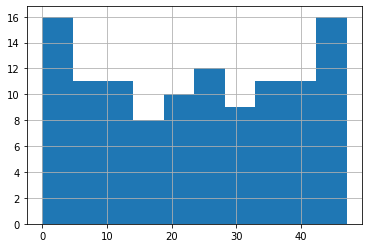

In [12]:
'''
Perform OPTICS on the dataset.
'''

clf = OPTICS(min_samples=2).fit(data)
labels = clf.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

data['labels'] = labels
data['labels'][data['labels']!= -1].hist()



Text(0.5, 1.0, 'T-SNE Visualization of OPTICS Clusters for Healthcare Sector')

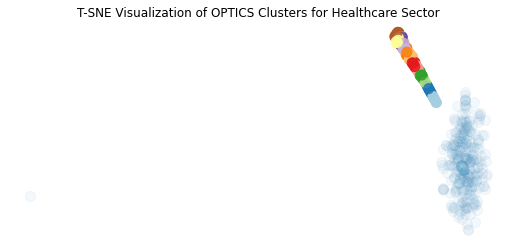

In [13]:
"""
Perform t-Distributed Stochastic Neighbor Embedding for visualization of OPTICS clusters.
"""

X_tsne = TSNE(learning_rate=1000, perplexity = 50, random_state=149).fit_transform(data)
plt.figure(1, figsize = (9, 4), facecolor='white')
plt.clf()
plt.axis('off')

plt.scatter(
    X_tsne[(labels!=-1), 0],
    X_tsne[(labels!=-1), 1],
    s=100,
    alpha=0.85,
    c=labels[labels!=-1],
    cmap=cm.Paired
)

plt.scatter(
    X_tsne[(data['labels']==-1).values, 0],
    X_tsne[(data['labels']==-1).values, 1],
    s=100,
    alpha=0.05
)
plt.title('T-SNE Visualization of OPTICS Clusters for Healthcare Sector')


In [14]:
'''
Generate groups for ADF testing.
'''
group2 = list(set(labels))
index_groups = []
for g in group2:
    group = []
    if g != -1:
        stks = data[data['labels'] == g].index
        stk = ""
        for s in stks:
            group.append(s.split(" ")[0])
            stk = stk + s.split(" ")[0] +" "
        index_groups.append(group)
        print("group", g, ":",stk)

group 0 : ALG CASS FSS GMT GRC MGRC WIRE 
group 1 : LECO PWR 
group 2 : DCI HUBB 
group 3 : ENR PNR RCII 
group 4 : LSTR KNGT 
group 5 : ACM NX 
group 6 : HUBG VALM 
group 7 : EFX TRU 
group 8 : CMCO FLOW 
group 9 : AYI CNHI WAB 
group 10 : ALLE AWI 
group 11 : CSL HII 
group 12 : BMI GGG IEX 
group 13 : UW WCNX 
group 14 : CEA ZNH 
group 15 : CP ROP 
group 16 : NDSN SSD 
group 17 : MTZ TKR 
group 18 : AZZ GLDD 
group 19 : ECOL ROMC 
group 20 : HURN VEC 
group 21 : BV NVT 
group 22 : HY WTHG 
group 23 : CVTI ROAD 
group 24 : CNI CSX NSC 
group 25 : LPX PTSI 
group 26 : NPK PKE 
group 27 : GD JCI PCAR 
group 28 : ASGN LAWS 
group 29 : BBSI CRAI 
group 30 : ANDA MNCL WSOB 
group 31 : EMR ETN 
group 32 : MAN NLSN 
group 33 : DXPE PKOH 
group 34 : SCS STAN 
group 35 : BLD IBP SITE 
group 36 : BLDR JELD 
group 37 : KELYA KNL 
group 38 : CAT MMM 
group 39 : HEI PAC 
group 40 : ASF MIC 
group 41 : GFF III 
group 42 : ASR OMAB RYAAY 
group 43 : ALK ALGT HA JBLU SAVE UAUA VVI 
group 44 : AMRC A

In [15]:
"""
Define the ADF function.
"""
def adf_test(x, y):
    '''
    This function performs the ADF test on the residuals from OLS: Y ~ X to see that whether
    these two series are cointegrated
    Output: test statistics
    '''
    x = sm.add_constant(x)
    model = sm.OLS(y,x)
    results = model.fit()
    res = results.resid
    test  = adfuller(res)
    
    return test[:2] # test stats, p value


In [16]:
adf_stat = {}
for g in index_groups:

    n = len(g)
    for i in range(n):
        for j in range(n):
            if i != j:
                x = X.loc[g[i]].values
                y = X.loc[g[j]].values
                result = adf_test(x, y)
                adf_stat[g[i] ,g[j] ] = result # ['x', 'y']

In [17]:
select_adf = {}
print(adf_stat)
for key in adf_stat:
    if adf_stat[key][1] > 0 and adf_stat[key][1] < 0.05:
        
        #select_adf[key] = [adf_stat[key][0], adf_stat[key][1], adf_stat[key][2]]
        select_adf[key] = [adf_stat[key][0], adf_stat[key][1]]

{('ALG', 'CASS'): (-7.349086047262675, 1.0171438988404718e-10), ('ALG', 'FSS'): (-9.211899892386679, 1.8779440468976124e-15), ('ALG', 'GMT'): (-14.33305634954454, 1.09161078641035e-26), ('ALG', 'GRC'): (-9.453768323844372, 4.542517698920219e-16), ('ALG', 'MGRC'): (-23.592810404525547, 0.0), ('ALG', 'WIRE'): (-8.297907680332981, 4.092466643218125e-13), ('CASS', 'ALG'): (-13.862283324394472, 6.695096691505165e-26), ('CASS', 'FSS'): (-7.672704810171416, 1.5781189166394777e-11), ('CASS', 'GMT'): (-13.513741621901472, 2.8205247671268004e-25), ('CASS', 'GRC'): (-12.50522319584559, 2.7500926541234144e-23), ('CASS', 'MGRC'): (-23.323561327523016, 0.0), ('CASS', 'WIRE'): (-12.903624133486268, 4.197393215104058e-24), ('FSS', 'ALG'): (-14.99551837804216, 1.1091919510884752e-27), ('FSS', 'CASS'): (-6.951450645902329, 9.669098293177594e-10), ('FSS', 'GMT'): (-23.269888196843187, 0.0), ('FSS', 'GRC'): (-8.387124098921955, 2.421479528966426e-13), ('FSS', 'MGRC'): (-22.021965389916634, 0.0), ('FSS', '

In [18]:
stocklist = {k: v[:2] for k, v in sorted(select_adf.items(), key=lambda item: item[1][1], reverse = False)}
print([[pair[0],pair[1]] for pair in stocklist])
print(stocklist)
print()
saved_stocklist = stocklist

[['HEI', 'PAC'], ['VVI', 'HA'], ['ALK', 'SAVE'], ['ALGT', 'HA'], ['ANDA', 'WSOB'], ['MNCL', 'WSOB'], ['NSC', 'CNI'], ['CSX', 'NSC'], ['SAVE', 'HA'], ['SAVE', 'JBLU'], ['NSC', 'CSX'], ['DCI', 'HUBB'], ['CNI', 'NSC'], ['MNCL', 'ANDA'], ['CNI', 'CSX'], ['UAUA', 'JBLU'], ['CP', 'ROP'], ['KELYA', 'KNL'], ['TRU', 'EFX'], ['LUV', 'HXL'], ['FSS', 'ALG'], ['JBLU', 'UAUA'], ['VVI', 'JBLU'], ['WIRE', 'ALG'], ['IBP', 'SITE'], ['GRC', 'ALG'], ['GMT', 'ALG'], ['ALG', 'GMT'], ['BLD', 'SITE'], ['GRC', 'GMT'], ['MGRC', 'ALG'], ['JBLU', 'SAVE'], ['CASS', 'ALG'], ['MIC', 'ASF'], ['AZZ', 'GLDD'], ['HXL', 'LUV'], ['OMAB', 'ASR'], ['CRAI', 'BBSI'], ['HII', 'CSL'], ['CASS', 'GMT'], ['CUB', 'PGTI'], ['WIRE', 'GMT'], ['FSS', 'WIRE'], ['SCS', 'STAN'], ['MGRC', 'GMT'], ['PNR', 'RCII'], ['CASS', 'WIRE'], ['AWI', 'ALLE'], ['VALM', 'HUBG'], ['SAVE', 'UAUA'], ['CASS', 'GRC'], ['CEA', 'ZNH'], ['ERJ', 'HXL'], ['GMT', 'FSS'], ['ALGT', 'VVI'], ['JCI', 'GD'], ['LSTR', 'KNGT'], ['ZNH', 'CEA'], ['CVTI', 'ROAD'], ['MGRC', '

In [19]:
'''
Finally we drop pairs that are not live for the entire sample period.
This output is used for selecting pairs.
'''
dropped = []
new = []
unfiltered_pairs = [[pair[0],pair[1]] for pair in saved_stocklist]
for pair in unfiltered_pairs:
    s0 = pair[0]
    s1 = pair[1]
    add1 = qb.AddEquity(s0)
    add2 = qb.AddEquity(s1)
    history1 = qb.History(add1.Symbol, datetime(2015,1,1), datetime(2018,8,2), Resolution.Daily)
    history2 = qb.History(add2.Symbol, datetime(2015,1,1), datetime(2018,8,2), Resolution.Daily)
    #print(history1.shape[0],history2.shape[0])
    if history1.shape[0] >= 1 and history2.shape[0] >= 1:
        new.append(pair)
    else:
        dropped.append(pair)

        
        
        
print(len(dropped))
print(len(new))
print(len(unfiltered_pairs))
print(new)

    
    

6
167
173
[['HEI', 'PAC'], ['VVI', 'HA'], ['ALK', 'SAVE'], ['ALGT', 'HA'], ['NSC', 'CNI'], ['CSX', 'NSC'], ['SAVE', 'HA'], ['SAVE', 'JBLU'], ['NSC', 'CSX'], ['DCI', 'HUBB'], ['CNI', 'NSC'], ['CNI', 'CSX'], ['UAUA', 'JBLU'], ['CP', 'ROP'], ['KELYA', 'KNL'], ['TRU', 'EFX'], ['LUV', 'HXL'], ['FSS', 'ALG'], ['JBLU', 'UAUA'], ['VVI', 'JBLU'], ['WIRE', 'ALG'], ['IBP', 'SITE'], ['GRC', 'ALG'], ['GMT', 'ALG'], ['ALG', 'GMT'], ['BLD', 'SITE'], ['GRC', 'GMT'], ['MGRC', 'ALG'], ['JBLU', 'SAVE'], ['CASS', 'ALG'], ['MIC', 'ASF'], ['AZZ', 'GLDD'], ['HXL', 'LUV'], ['OMAB', 'ASR'], ['CRAI', 'BBSI'], ['HII', 'CSL'], ['CASS', 'GMT'], ['CUB', 'PGTI'], ['WIRE', 'GMT'], ['FSS', 'WIRE'], ['SCS', 'STAN'], ['MGRC', 'GMT'], ['PNR', 'RCII'], ['CASS', 'WIRE'], ['AWI', 'ALLE'], ['VALM', 'HUBG'], ['SAVE', 'UAUA'], ['CASS', 'GRC'], ['CEA', 'ZNH'], ['ERJ', 'HXL'], ['GMT', 'FSS'], ['ALGT', 'VVI'], ['JCI', 'GD'], ['LSTR', 'KNGT'], ['ZNH', 'CEA'], ['CVTI', 'ROAD'], ['MGRC', 'CASS'], ['PWR', 'LECO'], ['SITE', 'IBP'], ['

In [20]:
tickers_in_pair = []
stocklist_new = []
for k in stocklist: 
    if (k[0] not in tickers_in_pair) and (k[1] not in tickers_in_pair):
        stocklist_new.append(k)
#         print("['"+k[0]+"', '"+k[1]+"']")
        tickers_in_pair.append(k[0])
        tickers_in_pair.append(k[1])


In [21]:
n = X_fund.shape[1]
print(n)
print(X_fund.head(4))
stocklist_new = stocklist
pairstopop = []
for pair in stocklist_new:
    s1 = pair[0]
    s2 = pair[1]
    pe1 = X_fund.loc[s1][0]
    pe2 = X_fund.loc[s2][0]
    mc1 = X_fund.loc[s1][n-1] #manual - switch to n-1
    mc2 = X_fund.loc[s2][n-1] #manual
    #print(pair, s1, s2, pe1, pe2, mc1, mc2)
    
    if (min(pe1, pe2) !=0) and (min(mc1, mc2) != 0):
        if (max(pe1, pe2)/ min(pe1, pe2) >= 4) or (max(mc1, mc2)/min(pe1, pe2)>=4):
            pairstopop.append(pair)
    

6
               0         1       2          3         4             5
AA     23.466667    7.2621  8.3617   1.848018  0.657790  6.118788e+09
AAL     3.216359  183.8803  0.7449  76.755299  0.617664  1.419362e+10
AAWW    4.867407    4.0940  0.6893   0.836731  0.546165  1.892300e+09
ABB   235.214286   34.0576  0.9722   4.249638  2.670034  6.624298e+10


In [22]:
finals = stocklist_new
for pair in pairstopop:
    finals.pop(pair)
print(pairstopop)

[('HEI', 'PAC'), ('VVI', 'HA'), ('ALK', 'SAVE'), ('ALGT', 'HA'), ('NSC', 'CNI'), ('CSX', 'NSC'), ('SAVE', 'HA'), ('SAVE', 'JBLU'), ('NSC', 'CSX'), ('DCI', 'HUBB'), ('CNI', 'NSC'), ('CNI', 'CSX'), ('UAUA', 'JBLU'), ('CP', 'ROP'), ('KELYA', 'KNL'), ('TRU', 'EFX'), ('LUV', 'HXL'), ('FSS', 'ALG'), ('JBLU', 'UAUA'), ('VVI', 'JBLU'), ('WIRE', 'ALG'), ('IBP', 'SITE'), ('GRC', 'ALG'), ('GMT', 'ALG'), ('ALG', 'GMT'), ('BLD', 'SITE'), ('GRC', 'GMT'), ('MGRC', 'ALG'), ('JBLU', 'SAVE'), ('CASS', 'ALG'), ('MIC', 'ASF'), ('AZZ', 'GLDD'), ('HXL', 'LUV'), ('OMAB', 'ASR'), ('CRAI', 'BBSI'), ('HII', 'CSL'), ('CASS', 'GMT'), ('CUB', 'PGTI'), ('WIRE', 'GMT'), ('FSS', 'WIRE'), ('SCS', 'STAN'), ('MGRC', 'GMT'), ('PNR', 'RCII'), ('CASS', 'WIRE'), ('AWI', 'ALLE'), ('VALM', 'HUBG'), ('SAVE', 'UAUA'), ('CASS', 'GRC'), ('CEA', 'ZNH'), ('ERJ', 'HXL'), ('GMT', 'FSS'), ('ALGT', 'VVI'), ('JCI', 'GD'), ('LSTR', 'KNGT'), ('ZNH', 'CEA'), ('CVTI', 'ROAD'), ('MGRC', 'CASS'), ('PWR', 'LECO'), ('SITE', 'IBP'), ('GRC', 'FSS

In [23]:
fortrade = [[pair[0],pair[1]] for pair in finals]
alreadyin = [] 
final = []
for pair in fortrade:
    if pair[0] not in alreadyin and pair[1] not in alreadyin:
        final.append(pair)
        alreadyin.append(pair[0])
        alreadyin.append(pair[1])
        
        

In [24]:
print(final)

[['ANDA', 'WSOB'], ['EGLE', 'GSTL']]


In [25]:
'''
Finally we drop pairs that are not live for the entire sample period.
'''
dropped = []
new = []
unfiltered_pairs = [[pair[0],pair[1]] for pair in saved_stocklist]
for pair in unfiltered_pairs:
    s0 = pair[0]
    s1 = pair[1]
    add1 = qb.AddEquity(s0)
    add2 = qb.AddEquity(s1)
    history1 = qb.History(add1.Symbol, datetime(2018,8,14), datetime(2018,8,15), Resolution.Daily)
    history2 = qb.History(add2.Symbol, datetime(2018,8,14), datetime(2018,8,15), Resolution.Daily)
    if history1.shape[0] >= 1 and history2.shape[0] >= 1:
        new.append(pair)
    else:
        dropped.append(pair)

        
        
        
print(len(dropped))
print(len(new))
print(len(unfiltered_pairs))
print(new)
        
    
    

6
1
7
[['EGLE', 'GSTL']]
